In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as pc
# In order to install pycaret successfuly using python version greater than 3.9 use pip install -U --pre pycaret


# Binary Classification 

In [5]:
# Load the data
from pycaret.datasets import get_data
df = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [7]:
#Shape of the data
df.shape

(24000, 24)

In [8]:
train = df.sample(frac=0.9, random_state=786)
test = df.drop(train.index).reset_index(drop=True)
train = train.reset_index(drop=True)
print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(test.shape))

Data for Modeling: (21600, 24)
Unseen Data For Predictions: (2400, 24)


### 6.0 Setting up Environment in PyCaret
#### The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline

In [11]:
train["default"].value_counts()

0    16801
1     4799
Name: default, dtype: int64

In [9]:
from pycaret.classification import *
experiment_1 = setup(data = train, target = 'default' , session_id=123)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(21600, 24)"
4,Transformed data shape,"(21600, 24)"
5,Transformed train set shape,"(15119, 24)"
6,Transformed test set shape,"(6481, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8225,0.7815,0.3751,0.6836,0.4833,0.3872,0.4131,0.8300
lightgbm,Light Gradient Boosting Machine,0.8214,0.7790,0.3736,0.6790,0.4810,0.3842,0.4096,0.0570
rf,Random Forest Classifier,0.8172,0.7625,0.3793,0.6526,0.4788,0.3776,0.3984,0.4620
ada,Ada Boost Classifier,0.8172,0.7750,0.3266,0.6863,0.4415,0.3487,0.3835,0.2060
lda,Linear Discriminant Analysis,0.8093,0.7169,0.2533,0.6953,0.3703,0.2859,0.3371,0.0220
et,Extra Trees Classifier,0.8085,0.7541,0.3638,0.6167,0.4568,0.3502,0.3684,0.2020
ridge,Ridge Classifier,0.7972,0.0000,0.1444,0.7205,0.2397,0.1789,0.2577,0.0110
lr,Logistic Regression,0.7778,0.6369,0.0000,0.0000,0.0000,-0.0001,-0.0014,0.2970
dummy,Dummy Classifier,0.7778,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
svm,SVM - Linear Kernel,0.7530,0.0000,0.0964,0.3398,0.0873,0.0348,0.0530,0.0330


In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Decision Tree Classifier

In [15]:
decision_tree = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7136,0.6161,0.4405,0.3766,0.4060,0.2189,0.2200
1,0.7202,0.6193,0.4375,0.3858,0.4100,0.2276,0.2284
2,0.7143,0.6069,0.4137,0.3717,0.3915,0.2056,0.2061
3,0.7302,0.6256,0.4375,0.4016,0.4188,0.2435,0.2439
4,0.7269,0.6275,0.4494,0.3984,0.4224,0.2444,0.2451
5,0.7269,0.6363,0.4732,0.4025,0.4350,0.2565,0.2579
6,0.7302,0.6375,0.4673,0.4067,0.4349,0.2588,0.2599
7,0.7097,0.5784,0.3423,0.3453,0.3438,0.1574,0.1574
8,0.7202,0.6118,0.4167,0.3815,0.3983,0.2165,0.2169


### K-Nearest Neighbors Classifier

In [16]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7493,0.5989,0.1875,0.3728,0.2495,0.1184,0.1285
1,0.7560,0.5869,0.1548,0.3796,0.2199,0.1046,0.1195
2,0.7348,0.5383,0.1607,0.3121,0.2122,0.0720,0.0777
3,0.7579,0.6026,0.1905,0.4051,0.2591,0.1363,0.1502
4,0.7447,0.6000,0.1875,0.3580,0.2461,0.1101,0.1185
5,0.7540,0.6110,0.1786,0.3846,0.2439,0.1199,0.1325
6,0.7573,0.6073,0.1845,0.4000,0.2525,0.1306,0.1445
7,0.7434,0.5810,0.1429,0.3243,0.1983,0.0723,0.0809
8,0.7474,0.5886,0.1994,0.3722,0.2597,0.1239,0.1326


### Random Forest Classifier


In [17]:
random_forrest = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.7775,0.3690,0.6703,0.4760,0.3778,0.4024
1,0.8175,0.7665,0.3958,0.6456,0.4908,0.3873,0.4045
2,0.8069,0.7383,0.3185,0.6294,0.4229,0.3216,0.3486
3,0.8188,0.7547,0.3958,0.6520,0.4926,0.3902,0.4082
4,0.8135,0.7522,0.3601,0.6436,0.4618,0.3597,0.3819
5,0.8254,0.7890,0.4405,0.6607,0.5286,0.4266,0.4399
6,0.8201,0.7809,0.4018,0.6553,0.4982,0.3962,0.4138
7,0.8135,0.7420,0.3304,0.6607,0.4405,0.3432,0.3729
8,0.8194,0.7669,0.4167,0.6452,0.5063,0.4020,0.4164


### Tune a Model
When a model is created using the create_model() function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model() function is used. This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass custom_grid parameter in the tune_model function (see 9.2 KNN tuning below).


In [18]:
# Tune the model
tuned_dt = tune_model(decision_tree)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8267,0.6548,0.3452,0.7342,0.4696,0.3818,0.4207
1,0.8208,0.6509,0.3452,0.6946,0.4612,0.3680,0.4004
2,0.8095,0.6150,0.2649,0.6846,0.3820,0.2945,0.3411
3,0.8148,0.6418,0.3304,0.6687,0.4422,0.3461,0.3771
4,0.8181,0.6418,0.3244,0.6943,0.4422,0.3502,0.3865
5,0.8241,0.6616,0.3690,0.6966,0.4825,0.3883,0.4168
6,0.8261,0.6565,0.3512,0.7239,0.4729,0.3834,0.4195
7,0.8082,0.6142,0.2649,0.6742,0.3803,0.2915,0.3363
8,0.8254,0.6614,0.3661,0.7069,0.4824,0.3898,0.4204


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [20]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7824,0.6363,0.0536,0.6207,0.0986,0.0656,0.1340
1,0.7745,0.6691,0.0476,0.4324,0.0858,0.0436,0.0801
2,0.7685,0.6191,0.0446,0.3409,0.0789,0.0290,0.0494
3,0.7831,0.6457,0.0804,0.5870,0.1414,0.0928,0.1554
4,0.7745,0.6336,0.0625,0.4468,0.1097,0.0583,0.0968
5,0.7778,0.6656,0.0476,0.5000,0.0870,0.0503,0.0982
6,0.7831,0.6579,0.0655,0.6111,0.1183,0.0787,0.1461
7,0.7831,0.6417,0.0536,0.6429,0.0989,0.0670,0.1390
8,0.7824,0.6627,0.0744,0.5814,0.1319,0.0858,0.1478


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
print(tuned_knn)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=45, p=2,
                     weights='uniform')


In [22]:
tuned_rf = tune_model(random_forrest)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8274,0.7757,0.3780,0.7095,0.4932,0.4006,0.4295
1,0.8234,0.7515,0.3690,0.6927,0.4816,0.3868,0.4147
2,0.8155,0.7426,0.2917,0.7050,0.4126,0.3248,0.3695
3,0.8155,0.7462,0.3512,0.6592,0.4583,0.3593,0.3852
4,0.8194,0.7421,0.3690,0.6703,0.4760,0.3778,0.4024
5,0.8221,0.7702,0.4167,0.6573,0.5100,0.4079,0.4237
6,0.8254,0.7682,0.3601,0.7118,0.4783,0.3867,0.4191
7,0.8069,0.6979,0.3155,0.6310,0.4206,0.3199,0.3476
8,0.8175,0.7585,0.3690,0.6596,0.4733,0.3734,0.3964


Fitting 10 folds for each of 10 candidates, totalling 100 fits


#### By default, tune_model optimizes Accuracy but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'AUC') will search for the hyperparameters of a Decision Tree Classifier that results in the highest AUC instead of Accuracy. For the purposes of this example, we have used the default metric Accuracy only for the sake of simplicity. Generally, when the dataset is imbalanced (such as the credit dataset we are working with) Accuracy is not a good metric for consideration. The methodology behind selecting the right metric to evaluate a classifier is beyond the scope of this tutorial but if you would like to learn more about it, you can click here to read an article on how to choose the right evaluation metric.

#### Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned Random Forest Classifier tuned_rf, as our best model for the remainder of this tutorial.



### Plot a Model
Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.


### AUC Plot

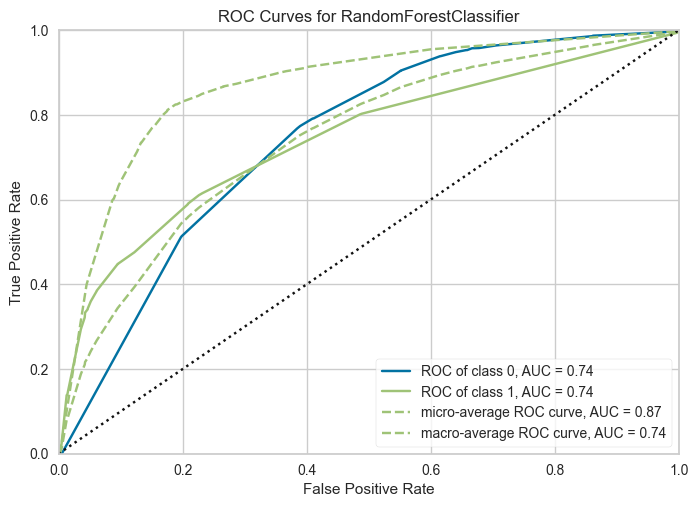

In [24]:
plot_model(tuned_rf, plot = 'auc')


# Precision Recall Curve

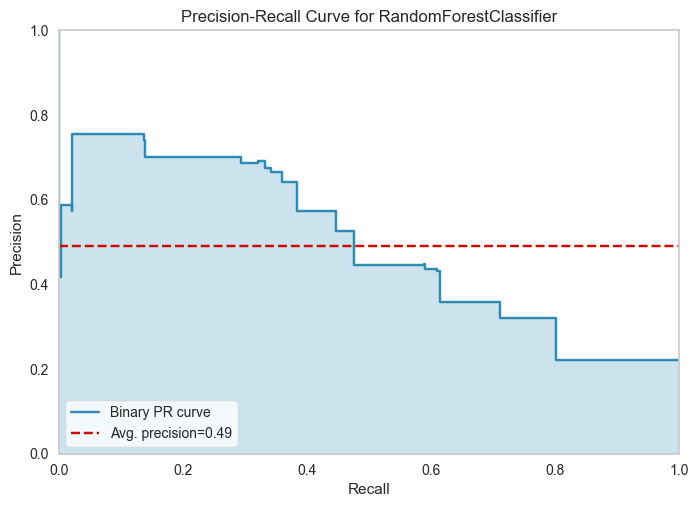

In [25]:
plot_model(tuned_rf, plot = 'pr')


### Featuere Importance Plot

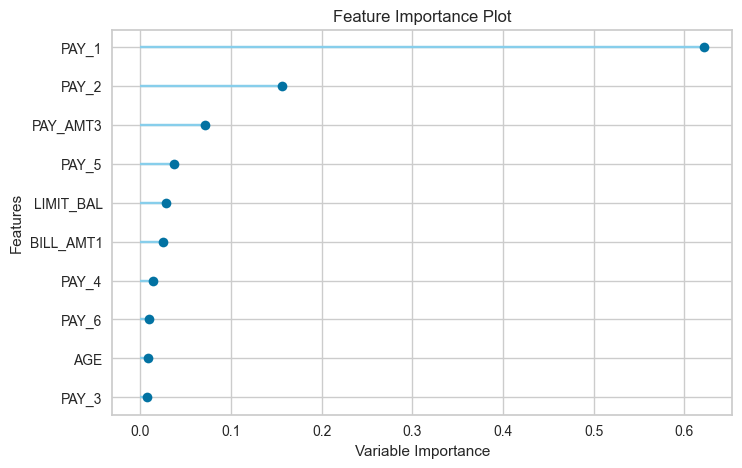

In [26]:
plot_model(tuned_rf, plot='feature')


### Confusion Matrix

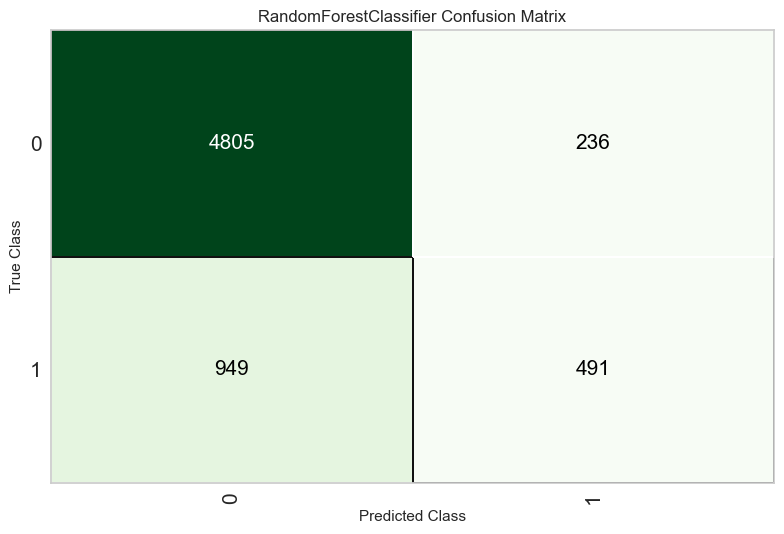

In [27]:
plot_model(tuned_rf, plot = 'confusion_matrix')


#### Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [28]:
evaluate_model(tuned_rf)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [29]:
final_rf = finalize_model(tuned_rf)


In [30]:
#Final Random Forest model parameters for deployment
print(final_rf)

Pipeline(memory=Memory(location=/var/folders/x0/zz3czyts4pb3csc4vprvvnkc0000gq/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PA...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=5, max_features=1.0,
                                        max_leaf_nodes=None, max_sample

In [31]:
predict_model(final_rf)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8209,0.7542,0.3333,0.7048,0.4526,0.3615,0.3978


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
15119,230000.0,2.0,2.0,2.0,29.0,2.0,2.0,2.0,0.0,0.0,...,186407.0,9500.0,0.0,6829.0,7300.0,7000.0,7000.0,1,1,0.6722
15120,340000.0,2.0,3.0,1.0,36.0,-1.0,2.0,2.0,-1.0,-1.0,...,82516.0,8.0,0.0,35958.0,50000.0,0.0,10000.0,0,0,0.8500
15121,30000.0,2.0,2.0,2.0,29.0,0.0,0.0,2.0,0.0,0.0,...,0.0,2429.0,5.0,1062.0,0.0,0.0,0.0,0,0,0.8411
15122,70000.0,2.0,2.0,2.0,30.0,-1.0,0.0,0.0,0.0,0.0,...,66854.0,2716.0,2570.0,2720.0,2350.0,2500.0,2660.0,1,0,0.8411
15123,50000.0,1.0,3.0,1.0,48.0,-1.0,-1.0,0.0,0.0,0.0,...,27940.0,33895.0,1439.0,959.0,994.0,1000.0,1013.0,0,0,0.8411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,120000.0,1.0,3.0,1.0,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0,0,0.7406
21596,20000.0,2.0,3.0,1.0,42.0,2.0,2.0,2.0,0.0,0.0,...,-1000.0,2994.0,0.0,1238.0,800.0,0.0,1000.0,1,1,0.6722
21597,50000.0,1.0,1.0,2.0,40.0,1.0,2.0,0.0,0.0,0.0,...,29053.0,1500.0,1500.0,1771.0,1500.0,1053.0,1093.0,0,0,0.6131
21598,50000.0,1.0,2.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1679.0,2438.0,1700.0,1000.0,0.0,0.0,0,0,0.8411


### Predict on unseen data

In [32]:
unseen_predictions = predict_model(final_rf, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8242,0.7775,0.3728,0.6451,0.4725,0.3759,0.3963


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.9073
1,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8311
2,50000.0,2.0,3.0,3.0,23.0,1.0,2.0,0.0,0.0,0.0,...,30211.0,0.0,1500.0,1100.0,1200.0,1300.0,1100.0,0,0,0.6131
3,380000.0,1.0,2.0,2.0,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9073
4,130000.0,2.0,2.0,1.0,51.0,-1.0,-1.0,-2.0,-2.0,-1.0,...,0.0,0.0,0.0,0.0,2353.0,0.0,0.0,0,0,0.6074


In [40]:
from pycaret.utils import get_scorer
x = unseen_predictions [unseen_predictions['default'] == unseen_predictions['prediction_label']]
print("Accuracy: ", len(x)/len(unseen_predictions))

Accuracy:  0.8241666666666667


## Saving the model

In [43]:
import datetime
save_model(final_rf,f'Final RF Model {datetime.datetime.now()}')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/var/folders/x0/zz3czyts4pb3csc4vprvvnkc0000gq/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PA...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_nodes=No

## Loading the model to be used

In [47]:
saved_final_rf = load_model('/Users/adirserruya/Desktop/PyCarret tutorial/Final RF Model 2022-12-11 13:33:38.451884')


Transformation Pipeline and Model Successfully Loaded


In [48]:
new_prediction = predict_model(saved_final_rf, data=test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8242,0.7775,0.3728,0.6451,0.4725,0.3759,0.3963


In [49]:
new_prediction.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.9073
1,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8311
2,50000.0,2.0,3.0,3.0,23.0,1.0,2.0,0.0,0.0,0.0,...,30211.0,0.0,1500.0,1100.0,1200.0,1300.0,1100.0,0,0,0.6131
3,380000.0,1.0,2.0,2.0,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9073
4,130000.0,2.0,2.0,1.0,51.0,-1.0,-1.0,-2.0,-2.0,-1.0,...,0.0,0.0,0.0,0.0,2353.0,0.0,0.0,0,0,0.6074
